In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import skewnorm
sns.set_style("whitegrid")


In [4]:
np.random.seed(1530)

size = 1000

x1 = np.random.normal(loc=40, scale = 2, size= int(size/2))
x2 = np.random.normal(loc= 69, scale= 2, size=int(size/2))

bi_modal = np.concatenate([x1, x2])

x1 = np.random.normal(loc=40, scale=4, size=int(size/4))
x2 = np.random.normal(loc= 69, scale=4, size=int(size/4))
x3 = np.random.normal(loc=0, scale=2, size=int(size/4))
x4 = np.random.normal(loc=80, scale=2, size=int(size/4))

multi_modal= np.concatenate([x1, x2, x3, x4])

df = pd.DataFrame(data={
    "Normal": np.random.normal(loc=0, scale=2, size= size),
    "Positive skewed": skewnorm.rvs(a=10, size=size),
    "Negative skewed": skewnorm.rvs(a=-10, size=size),
    "Exponential": np.random.exponential(scale=20, size=size),
    "Uniform": np.random.uniform(low=0.0, high=1.0, size=size),
    "Bimodal": bi_modal,
    "Multimodal": multi_modal,
    "Poisson": np.random.poisson(lam=1.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 16, 17, 20, 69], size=size)
}).round(3)

df.head()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-3.308,1.390,-1.441,22.500,0.395,42.250,38.503,0,20
1,0.695,0.199,-0.915,17.577,0.165,34.392,47.095,1,14
2,-0.592,0.353,-0.420,16.179,0.910,38.285,40.785,1,17
3,2.363,0.334,-1.644,17.131,0.500,38.806,32.635,0,14
4,2.562,0.914,-0.392,2.974,0.849,40.623,39.815,0,16


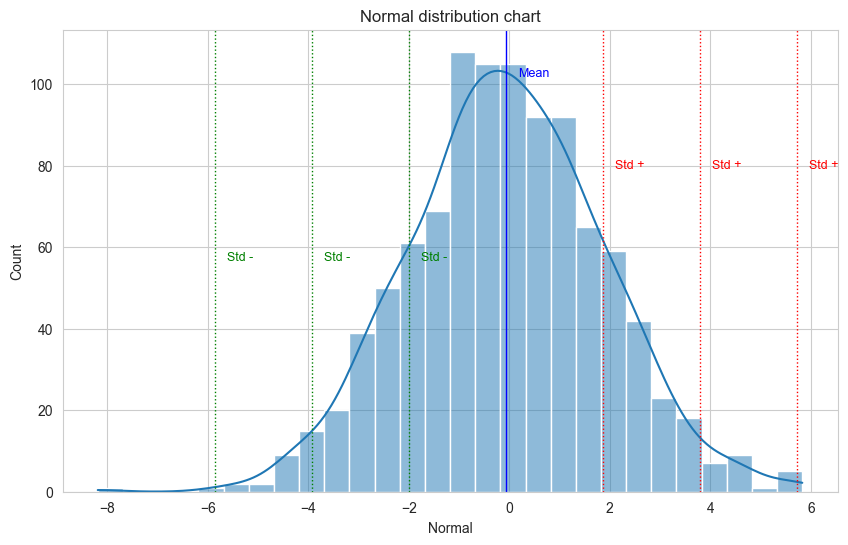

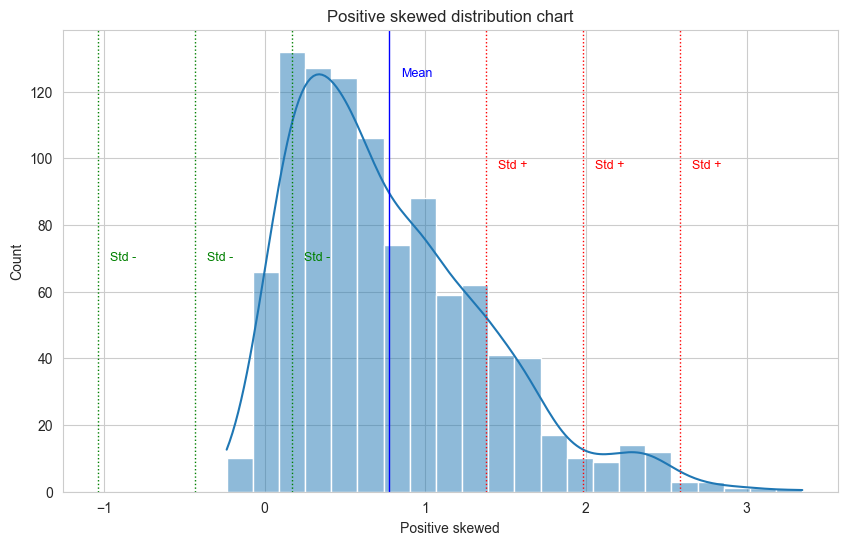

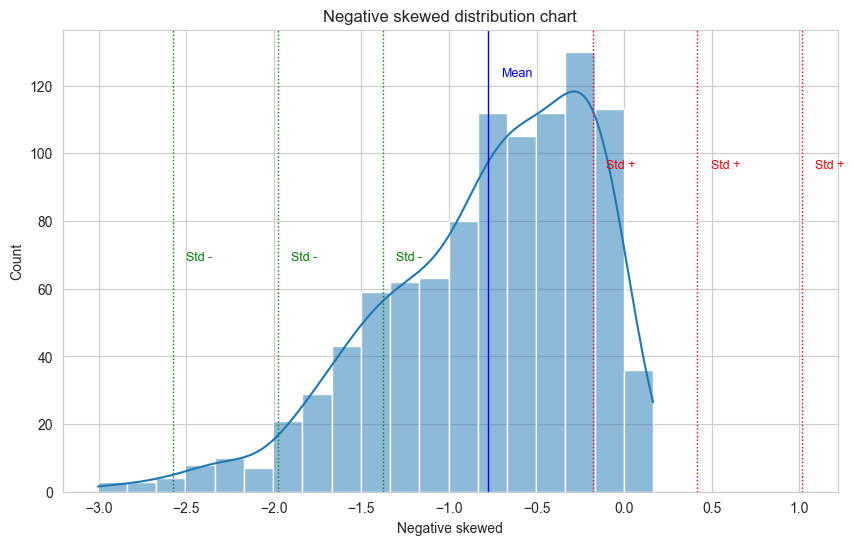

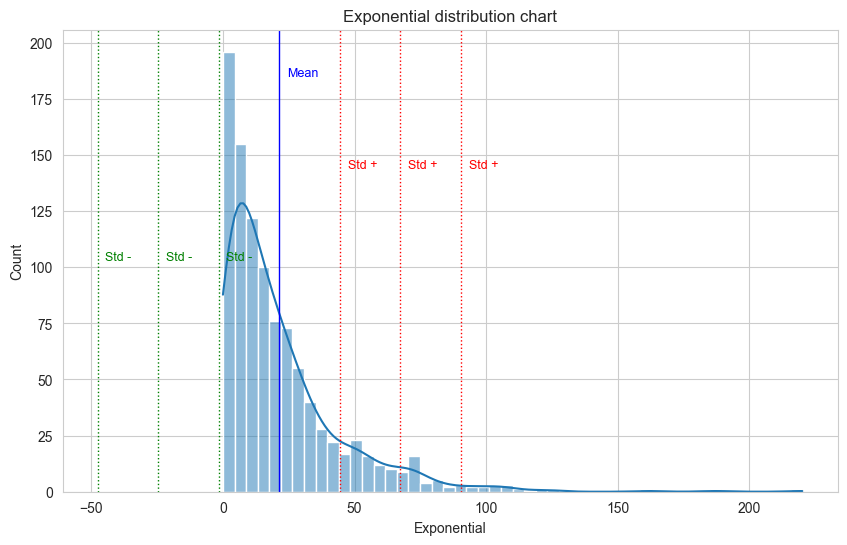

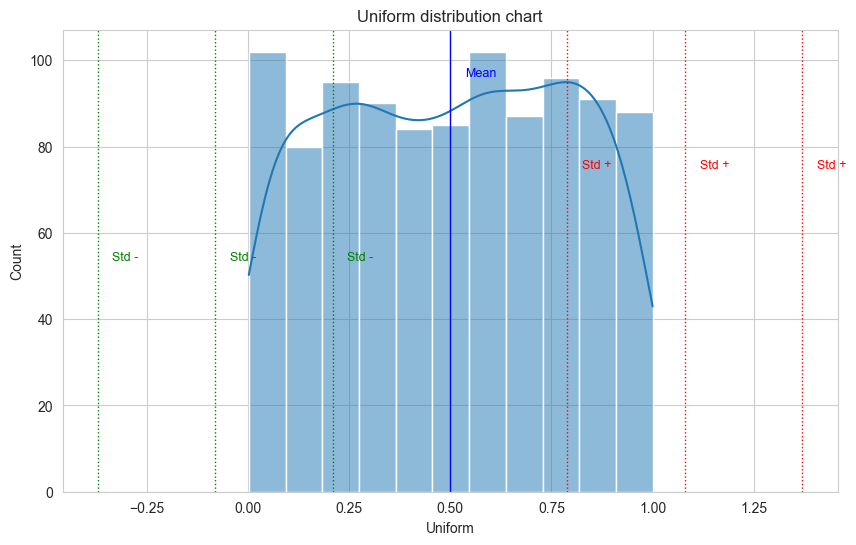

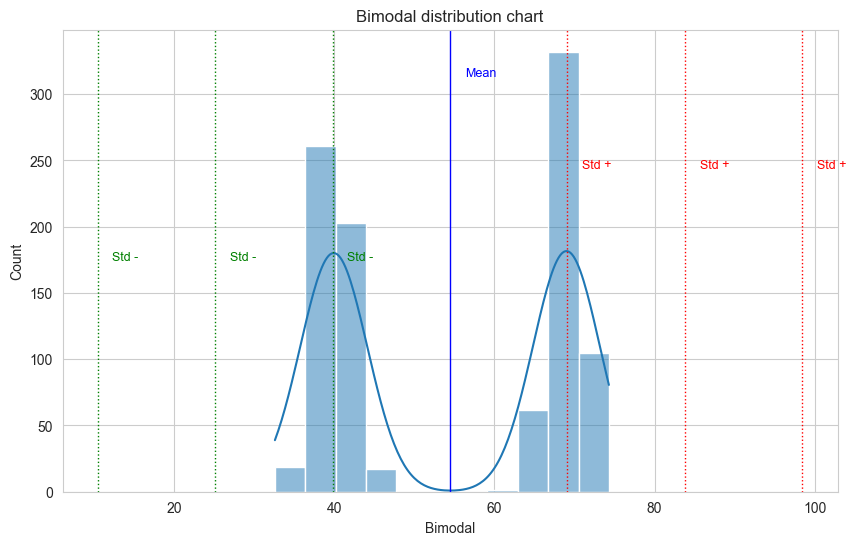

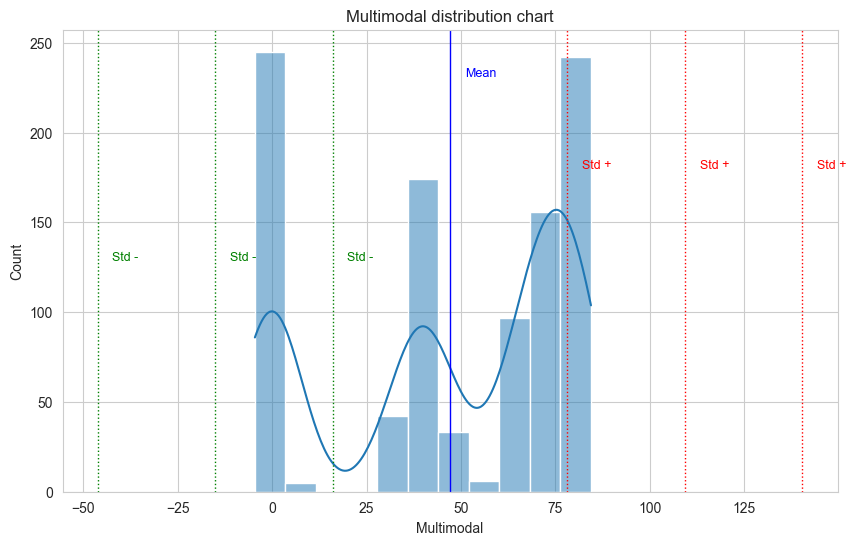

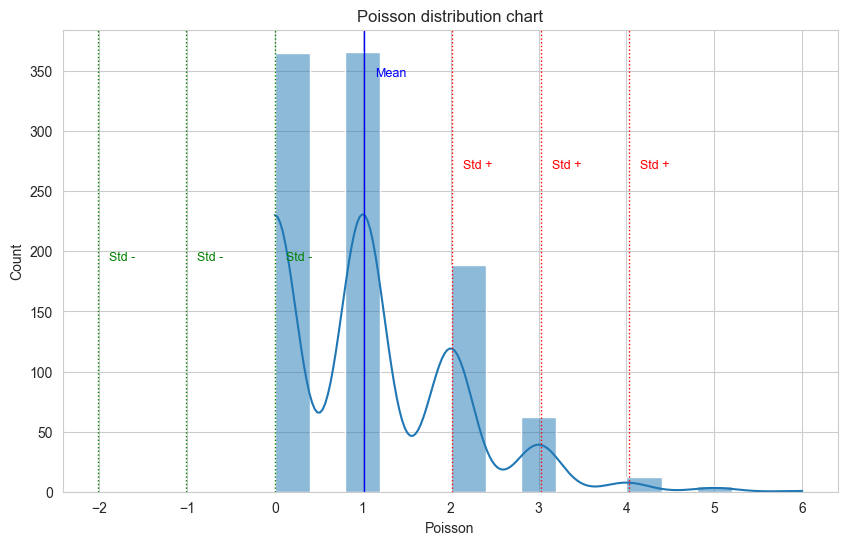

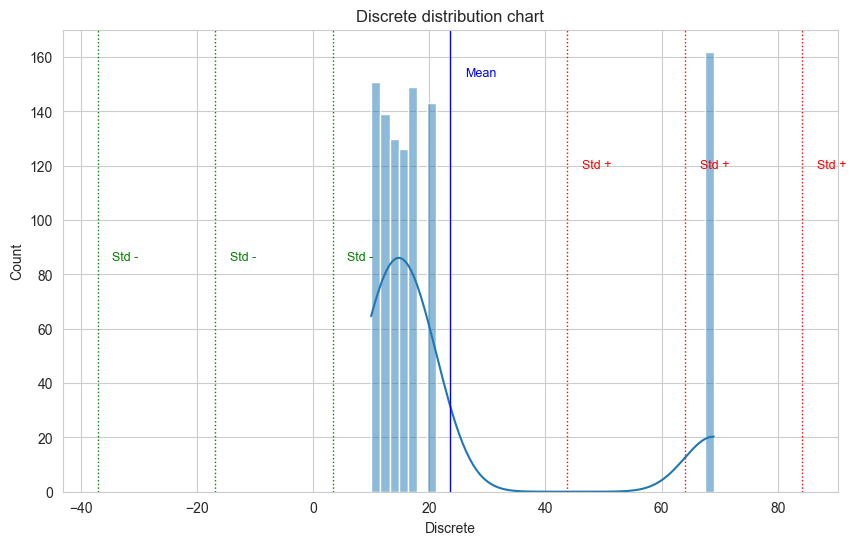

In [8]:
for col in df.columns:
    fig, axes = plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution chart")
    plt.axvline(df[col].mean(), linestyle="-", linewidth=1, c="b")
    plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1] * 0.90,
             s="Mean", fontsize=9, c="b")
    
    for num in [1, 2, 3]:
        plt.axvline(df[col].mean() + num * df[col].std(), linestyle=":", 
                    linewidth=1, c="r")
        plt.text(df[col].mean() + num * df[col].std() + df[col].std()/8, 
                    y= axes.get_ylim()[1] * 0.70, s="Std +", fontsize=9, c="r")
        
        plt.axvline(df[col].mean() - num * df[col].std(), linestyle=":", 
                    linewidth=1, c="g")
        plt.text(df[col].mean() - num * df[col].std() + df[col].std()/8, 
                    y= axes.get_ylim()[1] * 0.50, s="Std -", fontsize=9, c="g")
        

plt.show()

In [9]:
df.skew()

Normal             0.005137
Positive skewed    0.987649
Negative skewed   -0.841258
Exponential        2.528037
Uniform           -0.033462
Bimodal           -0.002569
Multimodal        -0.496302
Poisson            1.039835
Discrete           1.744309
dtype: float64

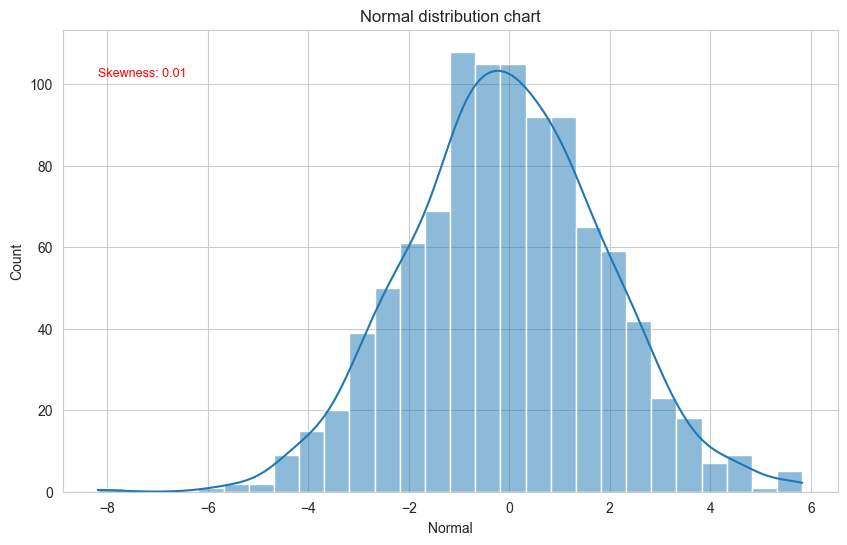

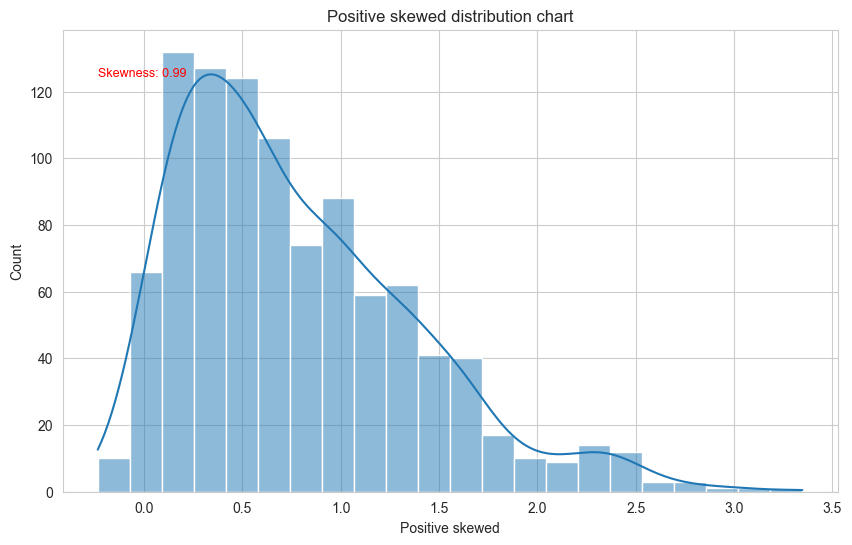

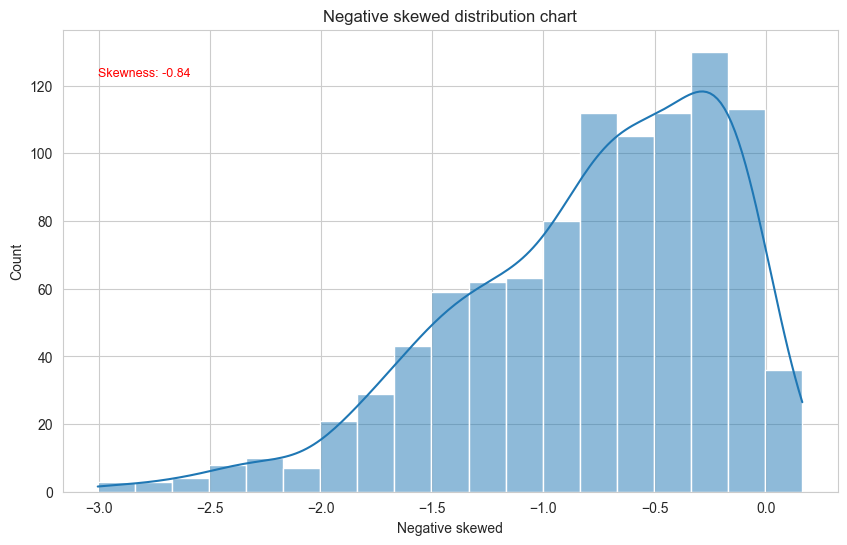

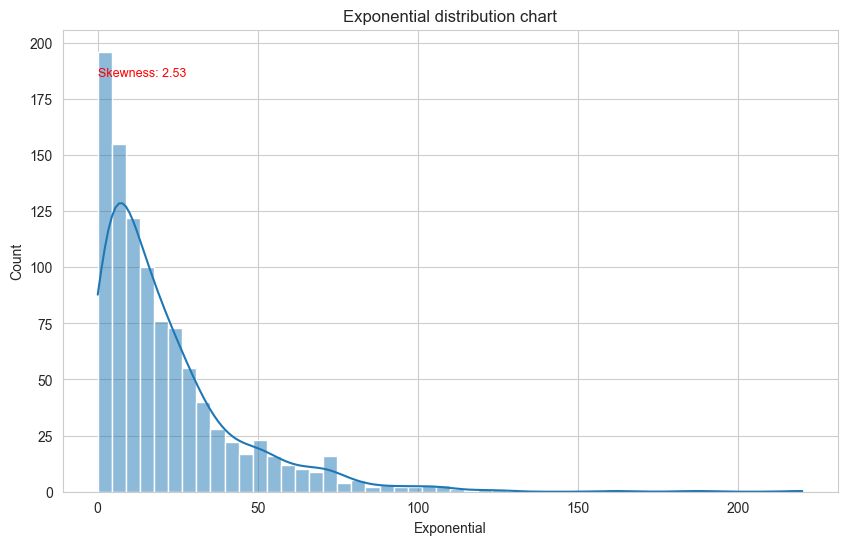

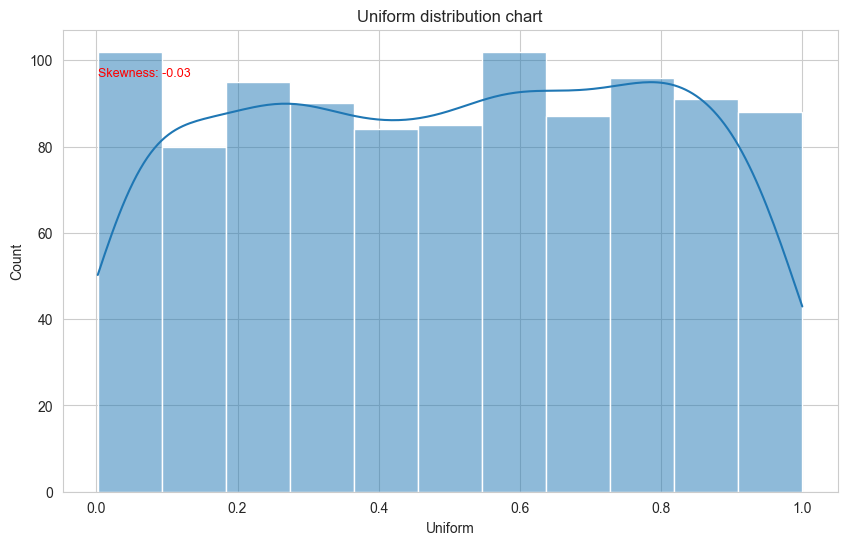

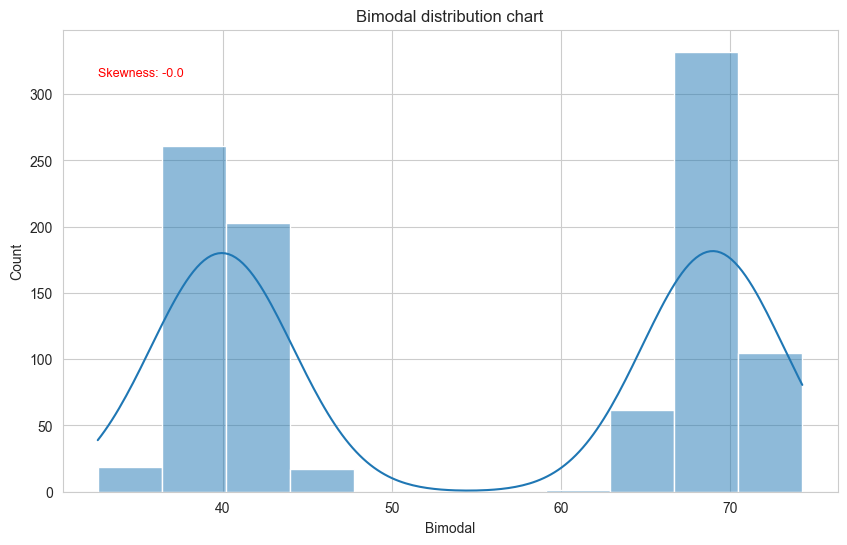

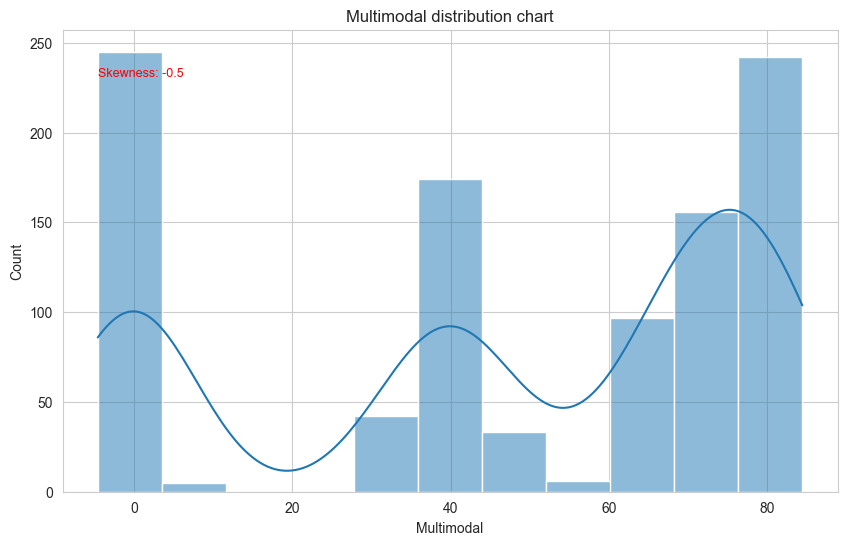

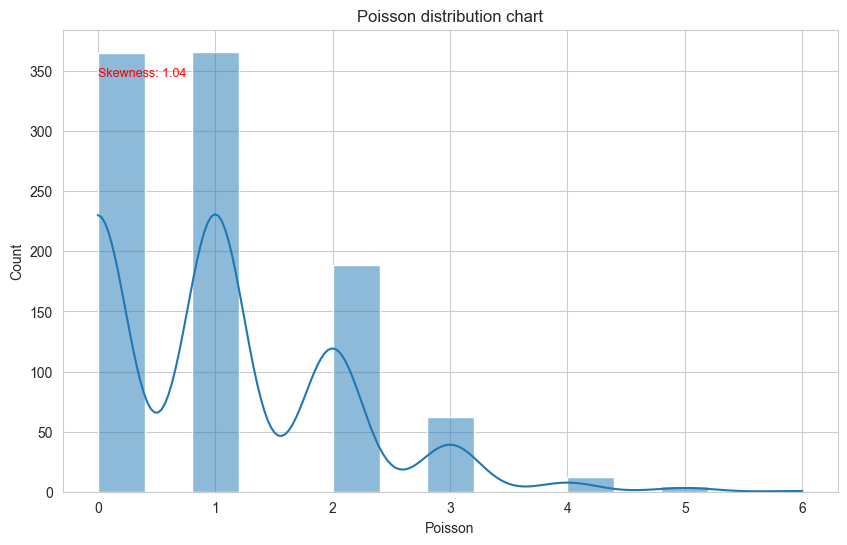

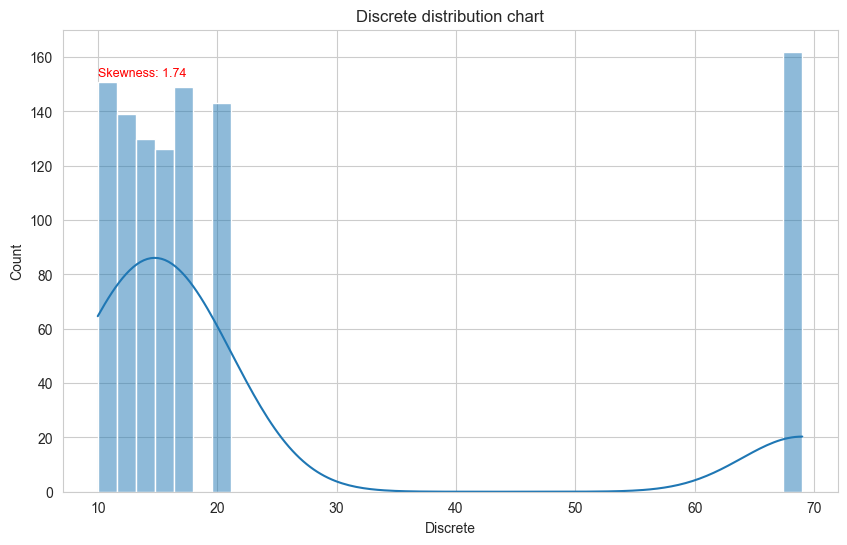

In [15]:
for col in df.columns:
    fig, axes= plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution chart")
    plt.text(df[col].min(), y=axes.get_ylim()[1] *0.90, fontsize=9, 
             s=f"Skewness: {df[col].skew().round(2)}", c="r")
    plt.show()
    print("\n\n")

In [11]:
df.kurtosis()

Normal              0.212078
Positive skewed     0.782773
Negative skewed     0.371594
Exponential        11.073491
Uniform            -1.209487
Bimodal            -1.931207
Multimodal         -1.272888
Poisson             1.268670
Discrete            1.205858
dtype: float64

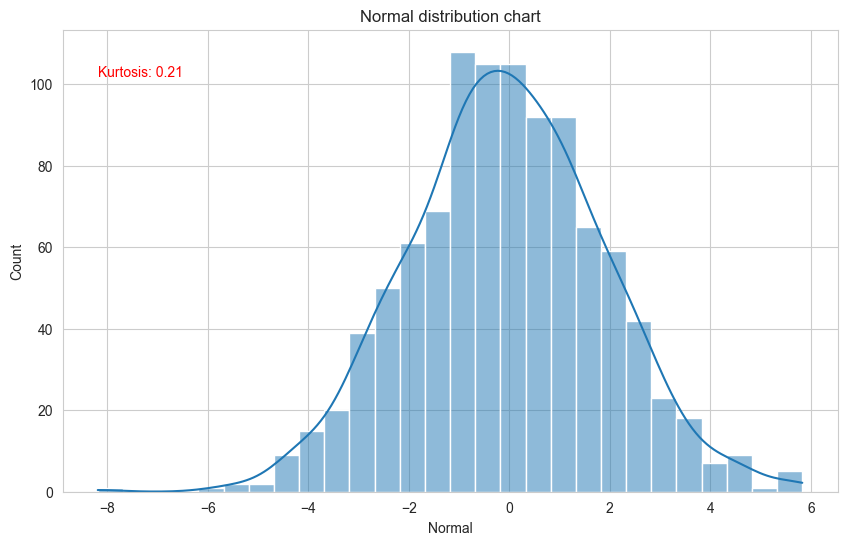

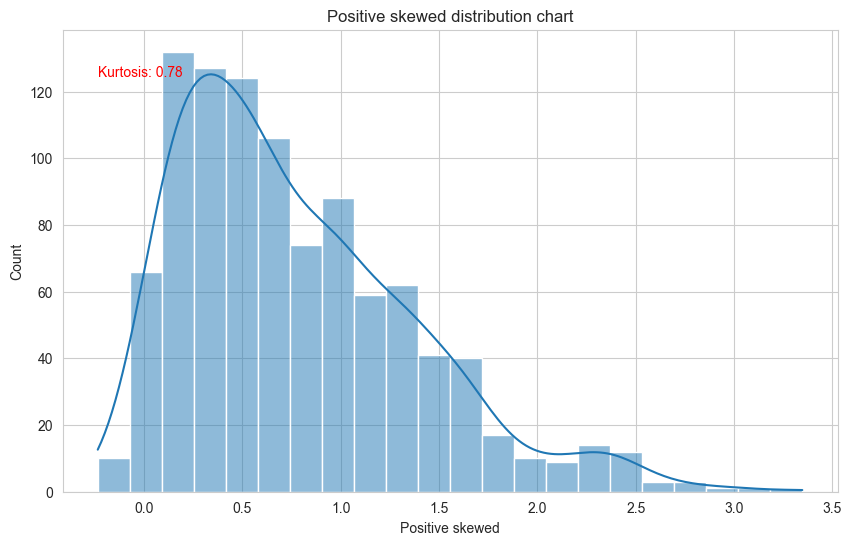

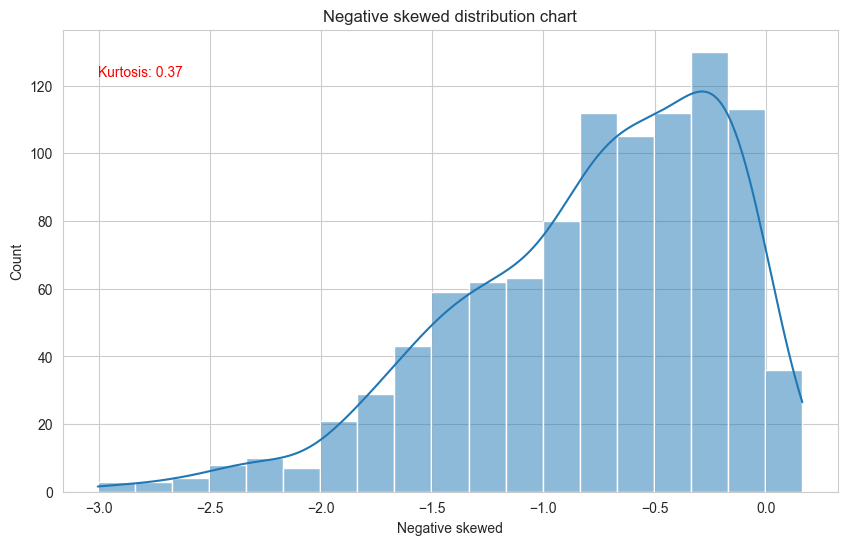

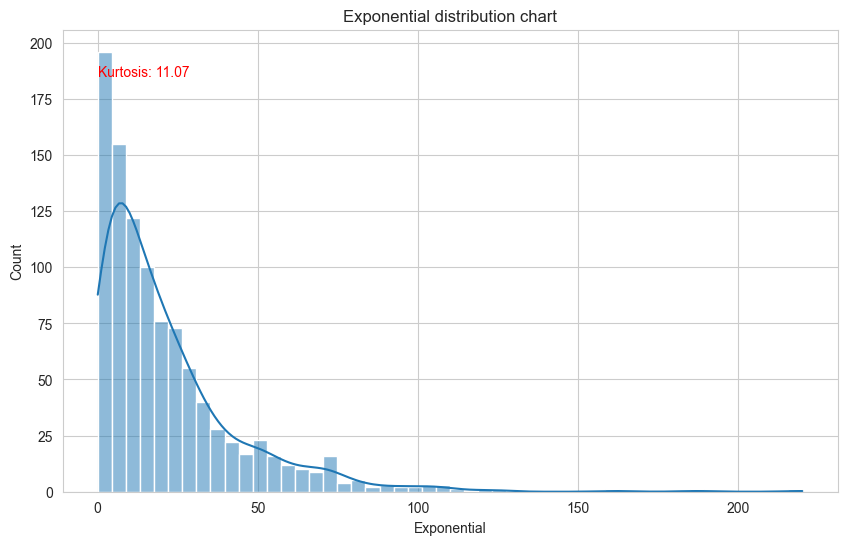

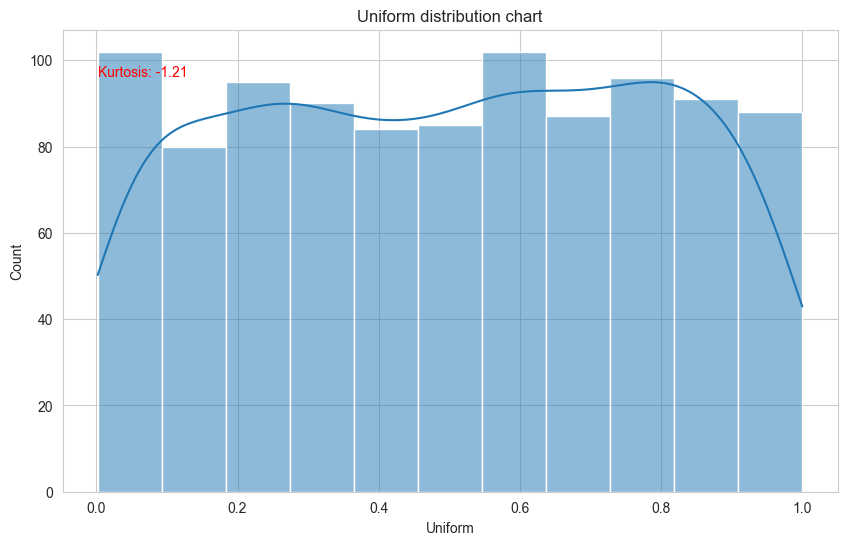

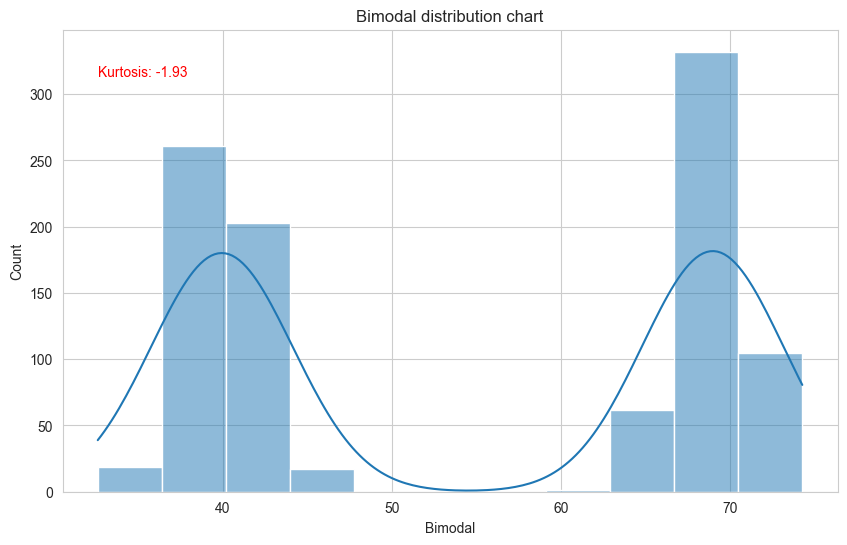

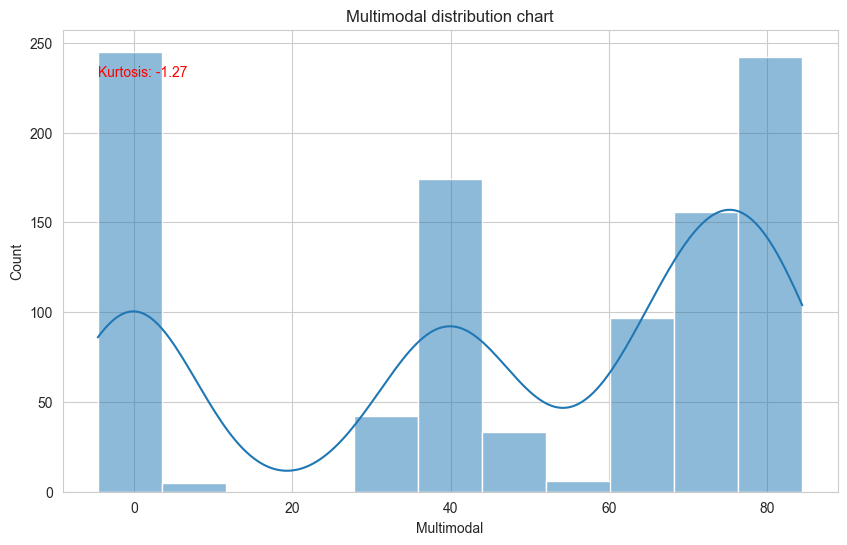

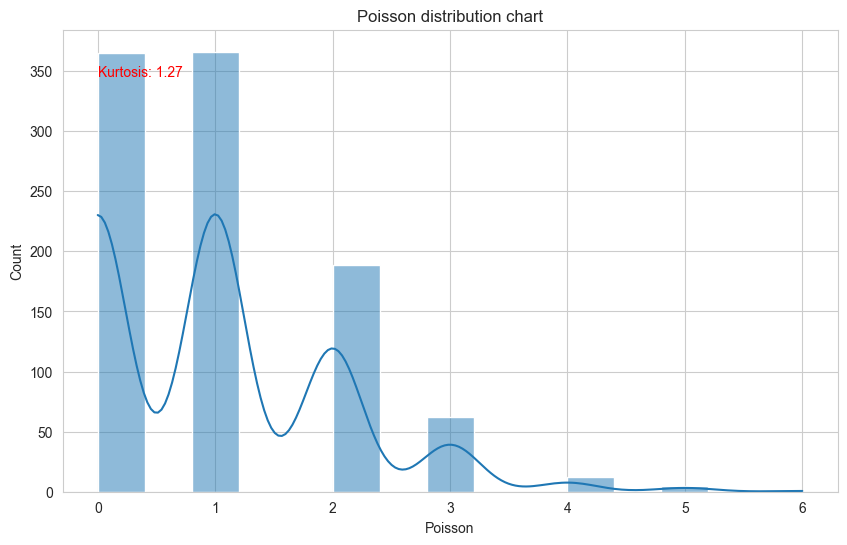

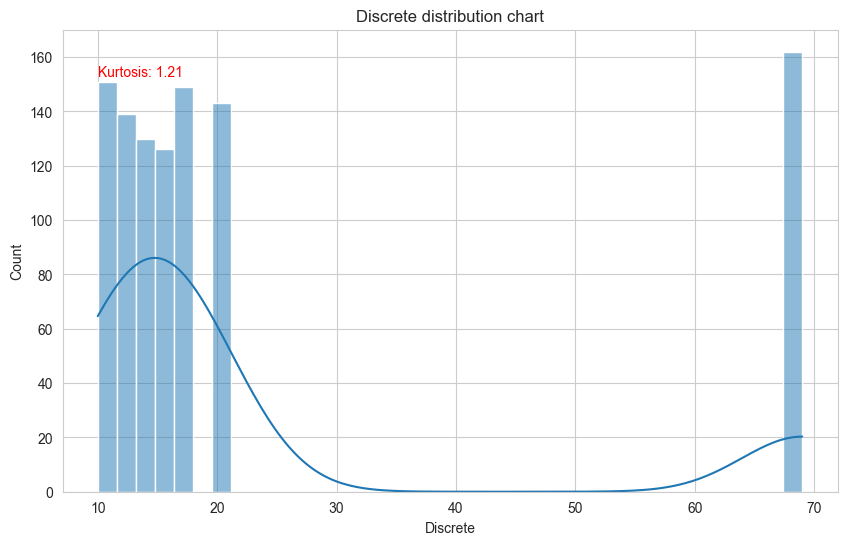

In [18]:
for col in df.columns:
    fig, axes = plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution chart")
    plt.text(df[col].min(), y=axes.get_ylim()[1] * 0.90, fontsize=10, c="r",
                s=f"Kurtosis: {df[col].kurtosis().round(2)}")
    plt.show()